# Examples showcasing GEM access to weather/climate data

This is a notebook showcasing workflow examples for downloading weather/climate data from meteoblue using eo-learn.

In [2]:
%matplotlib inline
import datetime

import matplotlib.pyplot as plt

from eolearn.core import EOPatch, FeatureType
from eolearn.io.extra.meteoblue import MeteoblueRasterTask, MeteoblueVectorTask
from sentinelhub import CRS, BBox, to_utm_bbox

### General parameters

In [3]:
# region of interest
coast_bbox = BBox(bbox=[-0.05, 40.23, 0.61, 40.63], crs=CRS.WGS84)

METEOBLUE_API_KEY = "<insert your meteoblue account API key here>"

### 1. Retrieving NEMS4 data in vector format

In [ ]:
eopatch = EOPatch(bbox=to_utm_bbox(coast_bbox), timestamp=[datetime.datetime(2022, 8, 1, 11, 0, 0)])

In [ ]:
query = {
    "domain": "NEMS4",
    "gapFillDomain": None,
    "timeResolution": "hourly",
    "codes": [{"code": 11, "level": "2 m above gnd"}],
    "transformations": [
        {"type": "aggregateTimeInterval", "aggregation": "mean"},
        {
            "type": "resampleToUtm",
            "zone": 31,
            "hemisphere": "northern",
            "xResolutionMeters": 1000,
            "yResolutionMeters": 1000,
            "interpolationMethod": "linear",
            "spatialAggregation": "mean",
            "disjointArea": "keep",
            "elevationDownscale": "enabled",
        },
    ],
}

units = {
    "temperature": "C",
    "velocity": "km/h",
    "length": "metric",
    "energy": "watts",
}

feature = FeatureType.VECTOR, "WEATHER-DATA"

meteoblue_task = MeteoblueVectorTask(
    feature,
    METEOBLUE_API_KEY,
    query=query,
    units=units,
)

eopatch = meteoblue_task.execute(eopatch)

In [ ]:
eopatch

In [ ]:
eopatch.vector["WEATHER-DATA"].plot(column="11_2 m above gnd_mean", legend=True)

In [ ]:
eopatch.vector["WEATHER-DATA"]["11_2 m above gnd_mean"].hist(bins=100)

### 2. Retrieving NEMS4 data in raster format

In [ ]:
eopatch = EOPatch(bbox=to_utm_bbox(coast_bbox), timestamp=[datetime.datetime(2022, 8, 1, 11, 0, 0)])

In [10]:
query = {
    "domain": "NEMS4",
    "gapFillDomain": None,
    "timeResolution": "hourly",
    "codes": [{"code": 11, "level": "2 m above gnd"}],
    "transformations": [
        {"type": "aggregateTimeInterval", "aggregation": "mean"},
        {
            "type": "resampleToUtm",
            "zone": 31,
            "hemisphere": "northern",
            "xResolutionMeters": 100,
            "yResolutionMeters": 100,
            "interpolationMethod": "linear",
            "spatialAggregation": "mean",
            "disjointArea": "keep",
            "elevationDownscale": "enabled",
        },
    ],
}

units = {
    "temperature": "C",
    "velocity": "km/h",
    "length": "metric",
    "energy": "watts",
}

weather_feature = FeatureType.DATA, "WEATHER-DATA"

meteoblue_task = MeteoblueRasterTask(weather_feature, METEOBLUE_API_KEY, query=query, units=units)

eopatch = meteoblue_task.execute(eopatch)

In [11]:
eopatch

EOPatch(
  data={
    WEATHER-DATA: numpy.ndarray(shape=(1, 427, 574, 1), dtype=float64)
  }
  bbox=BBox(((240507.963452323, 4457748.527744799), (297868.4997403156, 4500430.941787478)), crs=CRS('32631'))
  timestamp=[datetime.datetime(2022, 8, 1, 11, 0)]
)

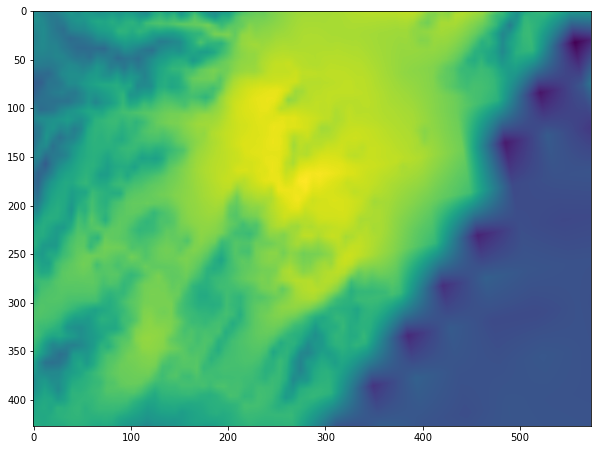

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(eopatch.data["WEATHER-DATA"][0].squeeze());